**Project Topic:**
Predictive analysis of the maximum achievable heart rate based on the presence of heart disease and other health factors/personal characteristics using linear regression.

**Objective of the Research Analysis:**
*   investigating the impact of various health factors and characteristics on the maximum achievable heart rate in patients
*   creating a regression model that will predict the maximum heart rate based on patient data
*   identifying significant risk and protective factors for the study of maximum heart rate levels





In [3]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
#Loading the data into the variable data
data = pd.read_csv("/content/heart.csv.xls")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Descriptive statistics for the dataset
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Characteristics of the dataset**

The dataset we are using consists of 14 columns representing specific variables and 303 rows, where the corresponding data is stored. One of the variables is of type float, while the others are of type int. In practice, this means we have data on 303 patients and their health data in the context of heart disease. Based on the descriptive statistics generated above, we can see that 68% of the data is from male patients, the average age of a patient is 54 years, around 54% of patients have been diagnosed with heart disease (positive in the context of our task, i.e., linear regression), and factors such as blood pressure, maximum achievable heart rate, and cholesterol levels are varied.

**Characteristics of the Variables**

1.   **age** - patient's age (quantitative variable)
2.   **sex** - gender (qualitative variable)
3.   **cp** - type of chest pain (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic) (qualitative variable)
4.   **trtbps** - resting blood pressure (in mm Hg) (quantitative variable)
5.   **chol** - cholesterol level (in mg/dl) (quantitative variable)
6.   **fbs** - fasting blood sugar level (>120mg/dl - 1, others 0) (qualitative variable)
7.   **restecg** - resting ECG result (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy) (qualitative variable)
8.   **thalachh** - maximum achieved heart rate (quantitative variable)
9.   **exng** - exercise-induced angina (1 = Yes, 0 = No) (qualitative variable)
10.  **oldpeak** - ST depression induced by exercise (compared to rest) - a measure of the difference in the ST segment on the electrocardiogram (ECG) during physical exertion compared to the resting state (quantitative variable)
11.  **slp** - slope of the ST segment on the ECG during maximum physical exertion (qualitative variable)
12.  **caa** - number of major blood vessels (qualitative variable)
13.  **thall** - thallium stress test result (qualitative variable)
14.  **output** - target variable - presence or absence of heart disease (qualitative variable)

The dependent variable is thalachh (maximum achieved heart rate), while the independent variables are the remaining variables: 1-7 and 9-14.

In [7]:
#Checking if the dataset contains any missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [8]:
#Descriptive statistics for the dependent variable - output
data['thalachh'].describe()

,thalachh
count,303.000000
mean,149.646865
std,22.905161
min,71.000000
25%,133.500000
50%,153.000000
75%,166.000000
max,202.000000


In [9]:
mediana = data['thalachh'].median()
print(f'The median is: {mediana}')

The median is: 153.0


Above are the descriptive statistics for the variable **thalachh**. The **count** indicates how many times the variable **thalachh** appears in the dataset, **mean** represents the arithmetic average of all observations, **std** shows the standard deviation, **min** indicates the minimum value, **25%** represents the value below which 25% of the smallest values lie, **50%** is the median value, which divides the data into two equal parts, with half of the observations being smaller and half being larger, **75%** represents the value below which 75% of the smallest values lie, and **max** indicates the maximum value in the dataset.

We can see that in our dataset, **output** occurred 303 times. The mean indicates that the maximum achieved heart rate is approximately 150 beats per minute, while the standard deviation value of 22.9 suggests that the data is dispersed at a moderate level. The further values, such as the minimum and maximum, reflect the range of values accepted by the variable; the maximum heart rate achieved is 202, and the minimum is 71 (for some patients). From the percentiles, the most meaningful observations are that 25% of patients in the dataset have a heart rate of approximately 134 beats per minute or lower, 50% of patients have a heart rate of 153 beats per minute or lower, and 75% of patients have a heart rate of 166 beats per minute or lower. The calculated median is close to the mean, which suggests that the variable follows a nearly symmetrical distribution around the mean, with a low number or absence of extreme values, and possibly approximates a normal distribution.

**Box plot with median and histogram for the variable thalachh.**

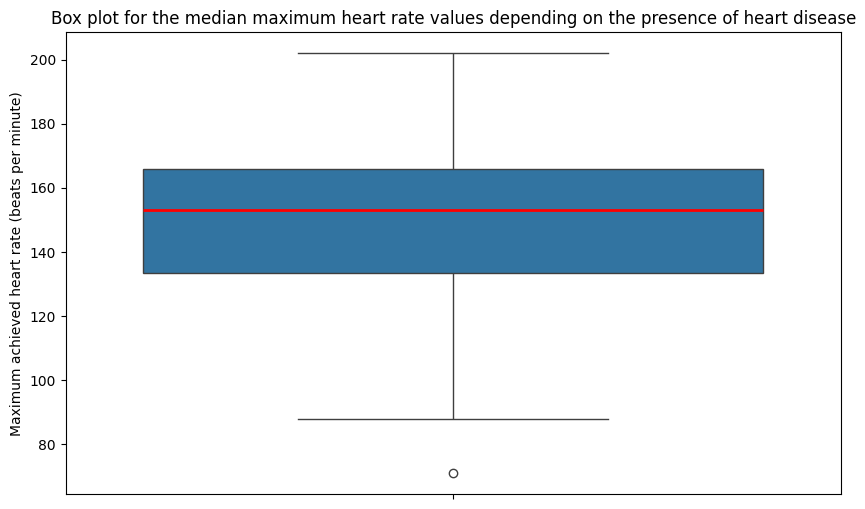

In [10]:
#Box plot with the inclusion of the median
plt.figure(figsize=(10, 6))
sns.boxplot(y='thalachh', data=data, medianprops={'color': 'red', 'linewidth': 2})
plt.title('Box plot for the median maximum heart rate values depending on the presence of heart disease')
plt.ylabel('Maximum achieved heart rate (beats per minute)')
plt.show()

The plot shows that most of the data regarding the maximum achieved heart rate is concentrated around the median and is fairly symmetrically distributed between 133 and 166 beats per minute. There is one outlier at the lower end of the distribution, indicating a patient with an exceptionally low maximum heart rate compared to the rest of the group. Overall, the data suggests a relatively even distribution of maximum heart rate, with a slight skew toward higher values (the upper whisker is slightly shorter than the lower one — data in the third quartile is more concentrated).

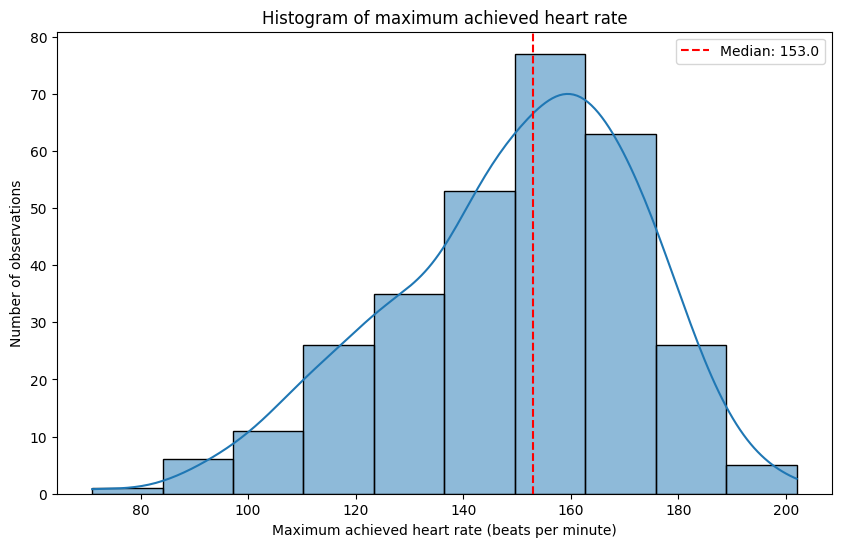

In [11]:
#Creating histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['thalachh'], bins=10, kde=True)
plt.axvline(x=mediana, color='red', linestyle='--', label=f'Median: {mediana}')
plt.title('Histogram of maximum achieved heart rate')
plt.xlabel('Maximum achieved heart rate (beats per minute)')
plt.ylabel('Number of observations')
plt.legend()
plt.show()

Above, we see the histogram of the maximum achieved heart rate along with the number of observations and the marked median. We can observe that the histogram's shape is similar to that of a normal distribution (but not identical — there is a slight right skew), with the highest number of observations falling in the range of 140-160 beats per minute. Based on this, we can also observe elements previously pointed out in the descriptive statistics — the median is slightly shifted to the right in relation to the mean.

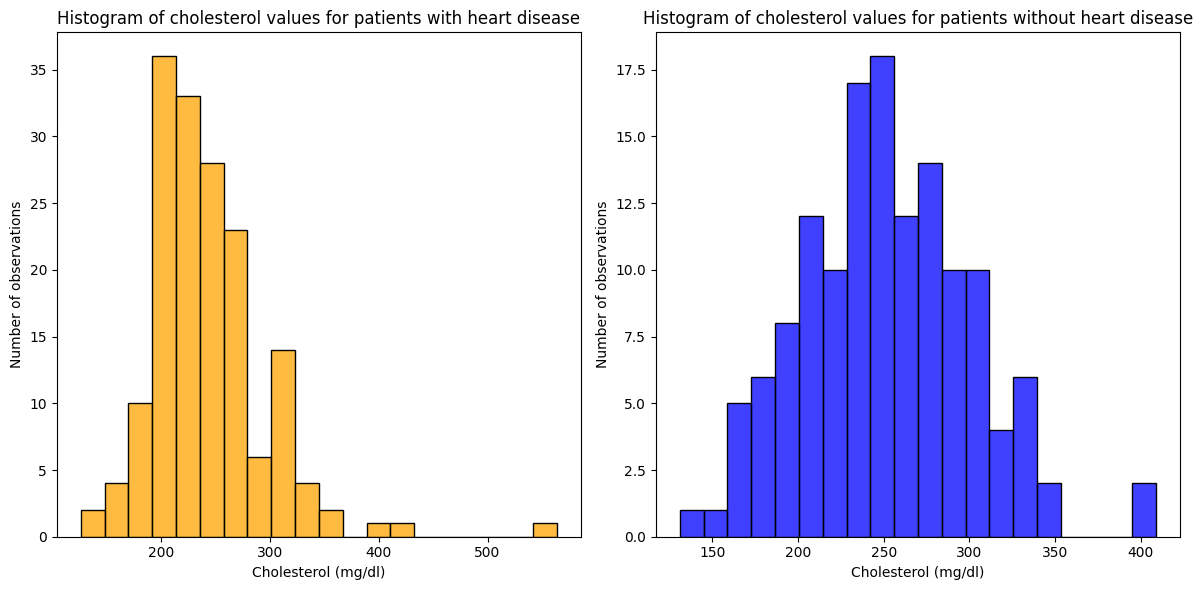

In [12]:
plt.figure(figsize=(12, 6))

#First histogram for output=1 (patients with heart disease)
plt.subplot(1, 2, 1)
sns.histplot(data[data['output'] == 1]['chol'], bins=20, color='orange', kde=False)
plt.title('Histogram of cholesterol values for patients with heart disease')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Number of observations')

#Drugi histogram dla output=0 (zdrowi)
plt.subplot(1, 2, 2)
sns.histplot(data[data['output'] == 0]['chol'], bins=20, color='blue', kde=False)
plt.title('Histogram of cholesterol values for patients without heart disease')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Number of observations')

plt.tight_layout()
plt.show()


Interpreting the values on the histograms, we arrive at similar conclusions as with the box plot. We see that patients without heart disease more frequently have cholesterol levels in the higher range (around >=250 mg/dl). Patients diagnosed with heart disease tend to have cholesterol levels in the lower range (<250 mg/dl), with a few extreme cases. For the group of undiagnosed patients, the values follow a pattern resembling a normal distribution, while for the diagnosed patients, there is a clear concentration and an increase around the 200 mg/dl mark.

**Categorized plots for maximum achieved heart rate**

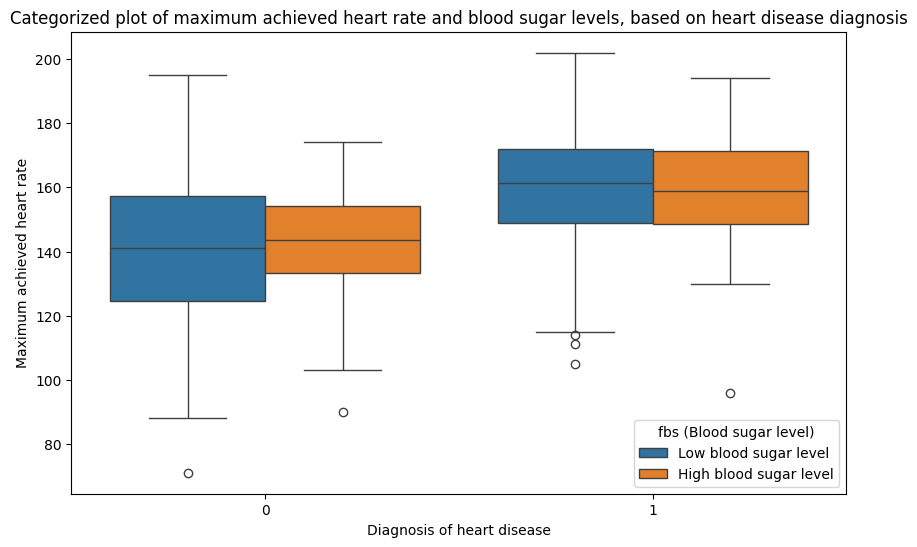

In [13]:
#Categorized box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='output', y='thalachh', hue='fbs', data=data)
plt.xlabel('Diagnosis of heart disease')
plt.ylabel('Maximum achieved heart rate')
plt.title('Categorized plot of maximum achieved heart rate and blood sugar levels, based on heart disease diagnosis')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Low blood sugar level', 'High blood sugar level']
plt.legend(handles, labels, title='fbs (Blood sugar level)', loc='lower right')
plt.show()

Looking at the plot, we can see that for the variable thalachh, which represents the maximum achieved heart rate, the distribution reaches higher values for individuals with heart disease than for those without. Additionally, when we consider the fasting blood sugar levels, we observe that individuals with low blood sugar have a greater spread in their maximum heart rate range, both in the box (quantiles) and whiskers. Individuals with high blood sugar have a smaller spread, but the lower bounds of the spread are higher compared to those with low blood sugar.

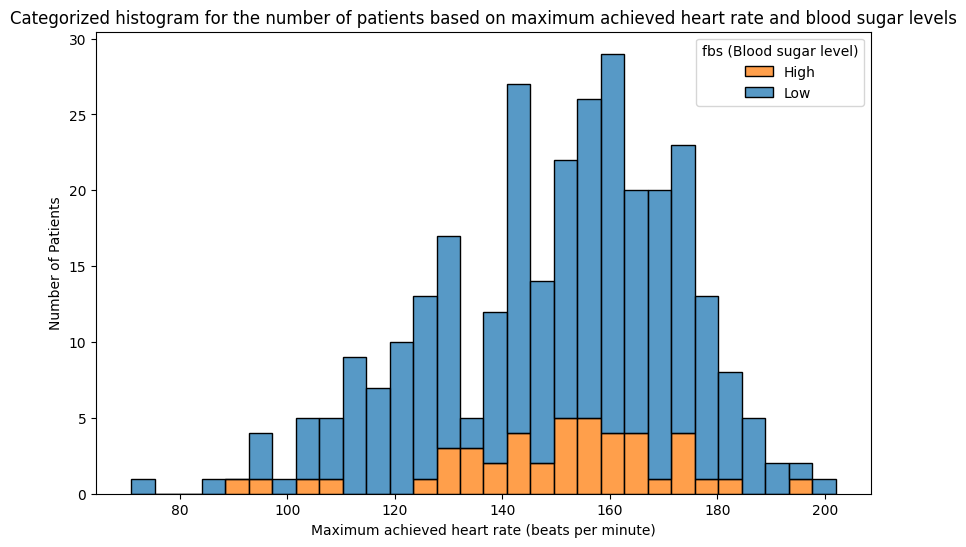

In [14]:
#Categorized histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='thalachh', hue='fbs', multiple='stack', bins=30)
plt.title('Categorized histogram for the number of patients based on maximum achieved heart rate and blood sugar levels')
plt.xlabel('Maximum achieved heart rate (beats per minute)')
plt.ylabel('Number of Patients')
plt.legend(title='fbs (Blood sugar level)', labels=['High', 'Low'])
plt.show()

Based on the plot, we can see that among individuals with high blood sugar, most have a heart rate in the range of 130-180 beats per minute. Among individuals with normal blood sugar levels, a large portion of the subjects fall within the 140-180 beats per minute range, but there is also a smaller, yet still significant, group with heart rates between 110-130 beats per minute. Additionally, we observe that there are significantly fewer individuals with high blood sugar compared to those with normal blood sugar levels.

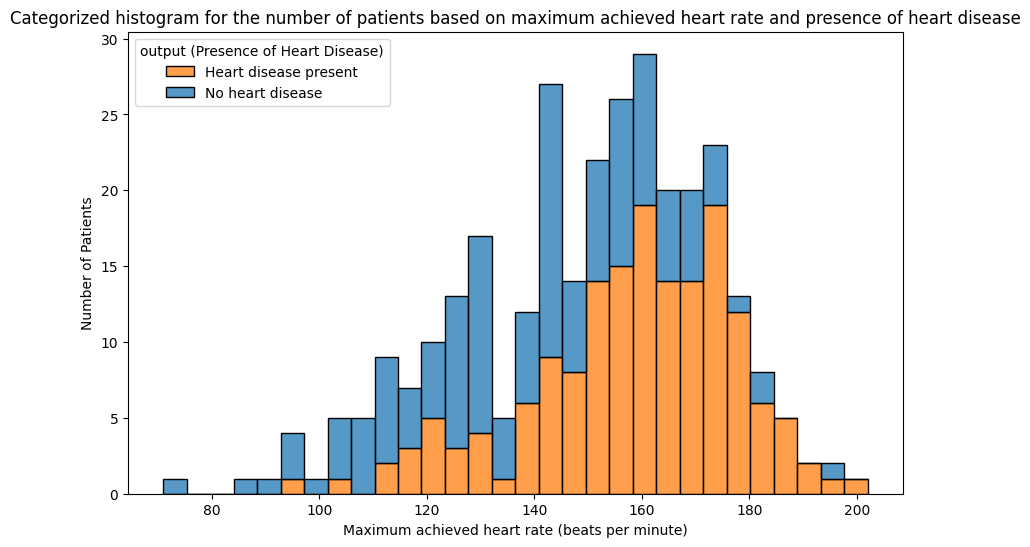

In [15]:
#Histogram of maximum achieved heart rate and presence of heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='thalachh', hue='output', multiple='stack', bins=30)
plt.title('Categorized histogram for the number of patients based on maximum achieved heart rate and presence of heart disease')
plt.xlabel('Maximum achieved heart rate (beats per minute)')
plt.ylabel('Number of Patients')
plt.legend(title='output (Presence of Heart Disease)', labels=['Heart disease present', 'No heart disease'])
plt.show()

In the plot, we can see that many patients with heart disease have a heart rate that falls in the upper range of all possible achieved values. Although those with high heart rates still do not constitute the majority compared to undiagnosed patients, we can hypothesize a potential link between this characteristic and the presence of heart disease.

<ipython-input-16-6a827ef79b1a>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


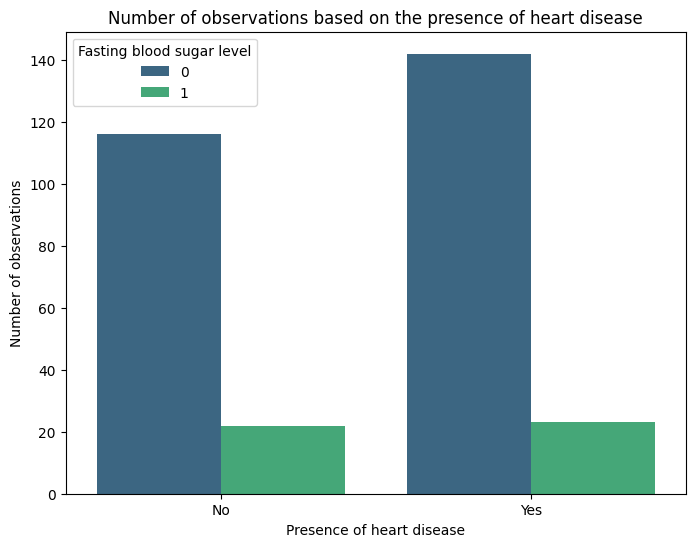

In [16]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='output', data=data, hue='fbs', palette='viridis')
ax.set_title('Number of observations based on the presence of heart disease')
ax.set_xlabel('Presence of heart disease')
ax.set_ylabel('Number of observations')
ax.set_xticklabels(['No', 'Yes'])
plt.legend(title='Fasting blood sugar level')
plt.show()

Based on the bar chart, we can see that high blood sugar alone does not appear to have an impact on the presence of heart disease. Patients with high blood sugar and a diagnosed heart condition number just over 20. The vast majority of patients with heart disease do not have high blood sugar. It is also worth noting that among the healthy patients, those with high blood sugar make up a larger portion of the group.

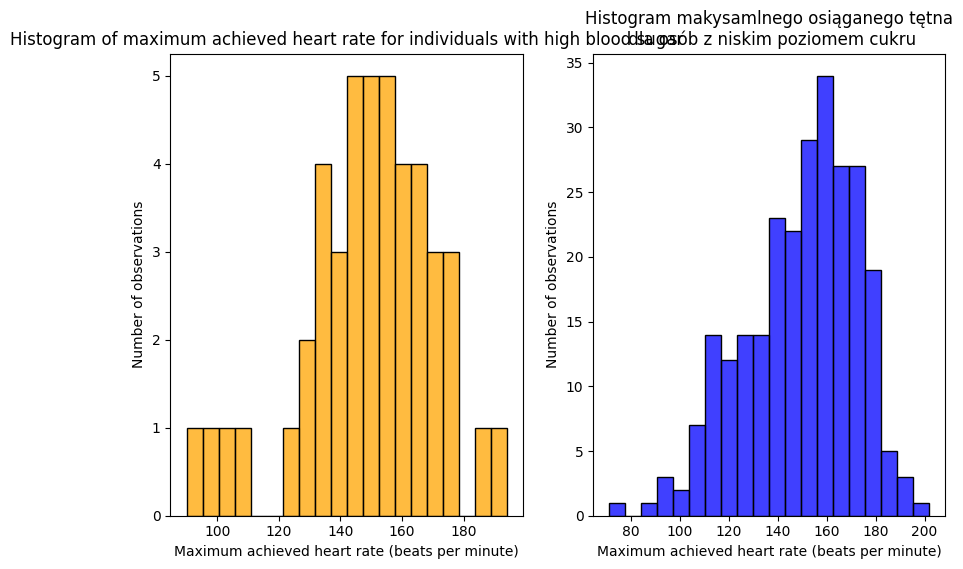

In [17]:
#Histograms of patients with low and high blood sugar based on maximum achieved heart rate
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.histplot(data[data['fbs'] == 1]['thalachh'], bins=20, color='orange', kde=False)
plt.title('Histogram of maximum achieved heart rate for individuals with high blood sugar')
plt.xlabel('Maximum achieved heart rate (beats per minute)')
plt.ylabel('Number of observations')
plt.subplot(1,2,2)
sns.histplot(data[data['fbs'] == 0]['thalachh'], bins=20, color='blue', kde=False)
plt.title('Histogram makysamlnego osiąganego tętna\n dla osób z niskim poziomem cukru')
plt.xlabel('Maximum achieved heart rate (beats per minute)')
plt.ylabel('Number of observations')
plt.show()

The histograms show the distribution of the number of patients based on their maximum achieved heart rate, each in their respective category, i.e., with high or low blood sugar. We can see that among individuals with high blood sugar, many have a heart rate in the relatively higher range (compared to the overall values) – 140-175 beats per minute. However, for individuals with low blood sugar, the situation looks very similar, with about 20-30 cases of normal heart rate in the lower range of 75-110 beats per minute – this does not seem to have significant importance in relation to the entire dataset.

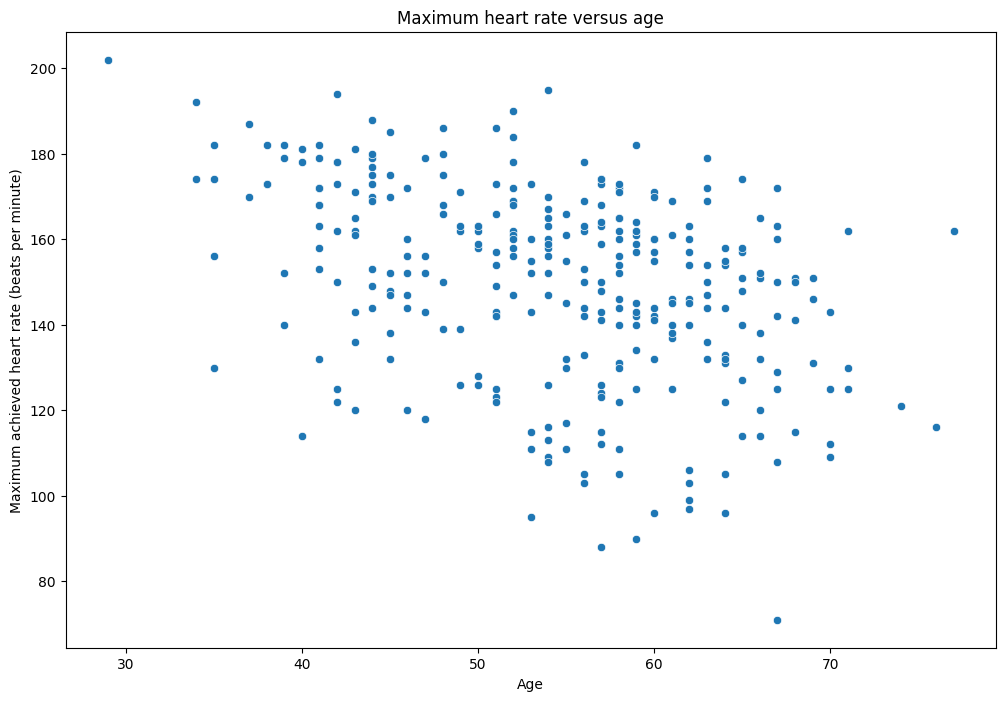

In [18]:
#Scatter plot for maximum heart rate and age
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='thalachh', data=data)
plt.title('Maximum heart rate versus age')
plt.xlabel('Age')
plt.ylabel('Maximum achieved heart rate (beats per minute)')
plt.show()

From the scatter plot, we can see that for individuals aged 30-40, the heart rate tends to be high, with values greater than 160 beats per minute. As age increases, there is a concentration of achieved heart rates in progressively lower values (a slight downward trend is visible), although extreme cases are also present. Additionally, it's worth noting that with increasing age, lower extreme values of heart rate are observed more frequently, compared to younger groups of patients.

**Verification of the hypothesis on the distribution of the dependent variable (maximum heart rate) being consistent with a normal distribution**

In [19]:
#Verification of the hypothesis on the distribution of the dependent variable (thalachh) being consistent with a normal distribution
#H0: The distribution is approximately normal (p > 0.05)

stat, p_value = shapiro(data['thalachh'])

#Interpretation of the test result:
alpha = 0.05
print("Test statistic: ", stat)
if p_value > alpha:
    print("There is not enough strong evidence to reject the hypothesis of the normality of the distribution., p = ", p_value, ")")
else:
    print("The hypothesis of the normality of the distribution is rejected p = ", p_value, ")")

Test statistic:  0.9763153561573904
The hypothesis of the normality of the distribution is rejected p =  6.620819654256604e-05 )


The result of the Shapiro-Wilk test indicates statistically significant differences in the distribution of the data compared to a normal distribution. The test statistic is 0.9763, and the p-value (p = 6.62e-05) is significantly lower than the established significance level (e.g., alpha = 0.05). (The test statistic in the Shapiro-Wilk test measures the degree of deviation of the data from a normal distribution; the higher the test statistic value, the closer the data are to a normal distribution. In our case, the data are still too far from normality relative to the assumed significance level.)

**Checking whether there is a correlational relationship between the studied variables**

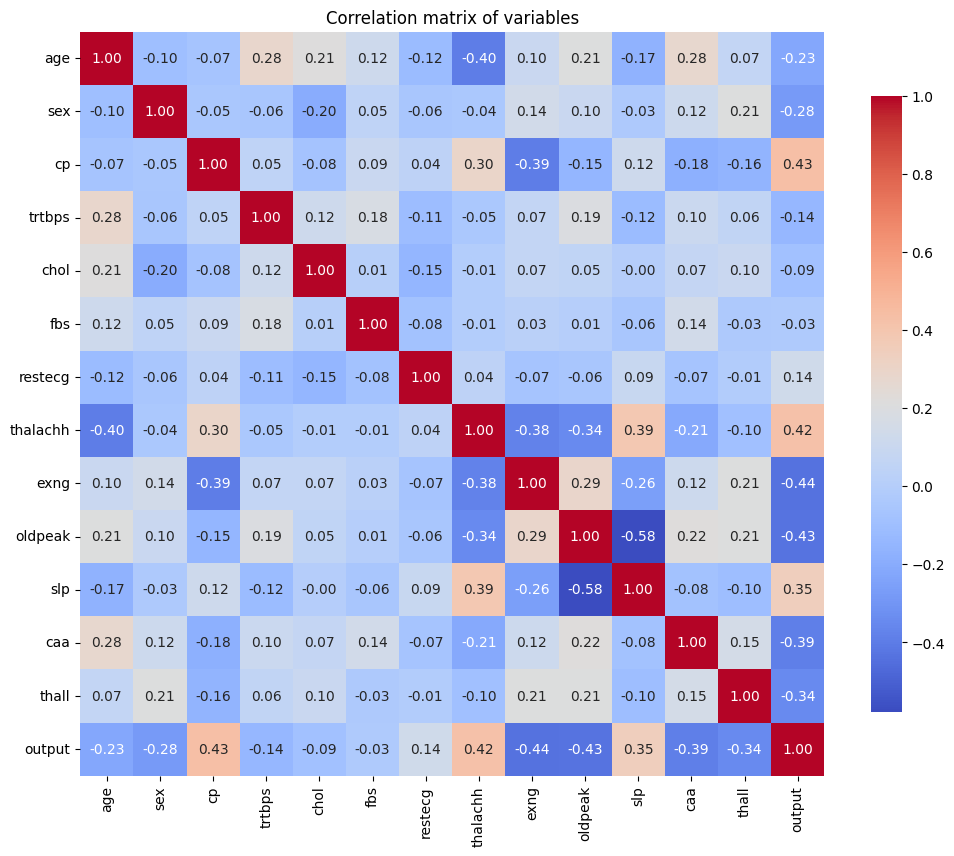

In [20]:
#Correlation matrix of variables
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation matrix of variables')
plt.show()

The overall correlation between the variables is moderate, with individual cases reaching values in the range of 0.4-0.6. The strongest negative correlations are observed between the variables oldpeak-output (an element of the ECG test - presence of heart disease), output-exng (presence of heart disease - exercise-induced angina), and slp-oldpeak (an element of the ECG test - an element of the ECG test). The strongest positive correlations are cp-output (type of chest pain - presence of heart disease) and output-thalachh (presence of heart disease - maximum heart rate achieved).

**Splitting into training and test sets**

In [21]:
X = data[['output','age', 'slp', 'exng', 'cp']]  #Explanatory variables
y = data['thalachh']  #Dependent variable - thalachh

#Splitting the dataset into training and test sets (80% training, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Displaying the size of the split datasets.
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 242 samples
Test set size: 61 samples


**Building a linear regression model**

In [22]:
#Building a regression model.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
#Coefficients for the explanatory variables - indicate how the output variable would change
#if a given variable were to change by one unit.
model.coef_

array([  5.65051635,  -0.71901046,   6.23771953, -10.2103188 ,
         2.46984941])

In [24]:
#Model Coefficients
print(f'Regression coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Regression coefficients: [  5.65051635  -0.71901046   6.23771953 -10.2103188    2.46984941]
Intercept: 178.05985130152388


In [25]:
#Prediction on the Test Set
predcitions_test = model.predict(X_test)
results_test = pd.DataFrame({'Actual values': y_test, 'Predicted values': predcitions_test})
results_test.head()

,Actual values,Predicted values
179,112,133.103656
228,159,149.285502
111,173,160.141909
246,150,133.822666
60,130,150.075763


In [26]:
#Prediction on the Training Set
predcitions_train = model.predict(X_train)
results_train = pd.DataFrame({'Actual values': y_train, 'Predicted values': predcitions_train})
results_train.head()

,Actual values,Predicted values
132,162,168.457217
202,111,138.622365
196,147,156.162789
75,161,152.872361
176,160,137.184344


In [29]:
#Model Evaluation Metrics
R2_train = r2_score(y_true = y_train, y_pred = predcitions_train)
R2_test = r2_score(y_true = y_test, y_pred = predcitions_test)

MAE_train = mean_absolute_error(y_true = y_train, y_pred = predcitions_train)
MAE_test = mean_absolute_error(y_true = y_test, y_pred = predcitions_test)

MSE_train = mean_squared_error(y_true = y_train, y_pred = predcitions_train)
MSE_test = mean_squared_error(y_true = y_test, y_pred = predcitions_test)

RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

print('R2_train: ', R2_train, '  R2_test: ', R2_test)
print('MAE_train: ', MAE_train, '  MAE_test: ', MAE_test)
print('MSE_train: ', MSE_train, '  MSE_test: ', MSE_test)
print('RMSE_train: ', RMSE_train, '  RMSE_test: ', RMSE_test)

R2_train:  0.34026988698610916   R2_test:  0.44744774270593457
MAE_train:  14.09040710031549   MAE_test:  14.404979976709143
MSE_train:  328.25869636769045   MSE_test:  342.1134503074496
RMSE_train:  18.117910927247944   RMSE_test:  18.49630909958659


The R^2 for the training data is 0.340, which means that the model explains 34.0% of the variance in the training data. The R² for the test data is 0.447, which means that the model explains 44.7% of the variance in the test data. These values suggest that the model has a moderate ability to explain the variability in the data. The R² for the test data is slightly higher than for the training data, which is unusual, but may indicate that the model is not overfitted and interprets new data well. The Mean Absolute Error (MAE) for the training data is 14.090, and for the test data it is 14.405. These values are close, suggesting that the model has similar accuracy on the training and test data. MAE gives us the average error magnitude in the units of the dependent variable, which may be easier to interpret in the context of a specific problem. The Mean Squared Error (MSE) for the training data is 328.259, and for the test data it is 342.113. MSE gives greater weight to larger errors (due to squaring). These values are also close for the training and test data, which indicates a lack of model overfitting. The Root Mean Squared Error (RMSE) for the training data is 18.118, and for the test data it is 18.496. RMSE is a measure of error in the same units as the dependent variable. The close RMSE values for the training and test data indicate consistent model performance on both datasets. In summary, the model exhibits a moderate ability to explain the variability in the data (R² at around 0.34-0.45). The error measures (MAE, MSE, RMSE) are similar for the training and test data, suggesting that the model generalizes well and is not overfitted.